In [1]:
import numpy as np # linear algebra
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
import util
from timeit import default_timer as timer
# set a results file
logger = util.result(path="", file="results.logs")
logger.propagate = False

from sklearn.preprocessing import StandardScaler

<h3 style="color: #dddda1">Pull configs and set defaults</h3>

In [2]:
files = util.get_config_values("files")
validation_types = util.get_config_values("validation_types")
split_types = util.get_config_values("split_types")

split_size = util.get_config_values("split_size")
preprocessors = util.get_config_values("preprocessors")
models = util.get_config_values("models")
evaluators = util.get_config_values("evaluators")
folds = util.get_config_values("general", list_type=False, key="folds")
wl = np.arange(1100, 2252, 2) # Set wavelength range
pipeline_run_types = util.get_config_values("pipeline_run_types")

# Using the beer dataset
dataset = files[1]

# Nothing to change here.
split_params = {
    'sep' : ',',
    'drop_columns' : ['y'],
    'index_column' : None,
    'y_data_column' : 'y',
}

<h3 style="color: #00faaa">Running SVR pipeline with following parameters</h3>
<h5 style="color: white">Preprocessor - Derivative / SNV </h5>
<h5 style="color: white">Train/Test split - 85/15 OR 75/25</h5>
<h5 style="color: white">Validation method - KFolds</h5>

INFO ************************************
INFO Pipeline Start...
INFO Pipeline params :
INFO Data : data/beer_dataset.csv , Preprocessor : snv, Model : svr, Evaluator : mse
INFO Validation type : kfold-cv, folds (for CV) : 5
INFO [PRE PROCESSING]
INFO [VALIDATION AND HYPERPARAMETER TUNING]


R-squared score: 0.9618770268728667
Mean Squared Error: 0.1671303792673879
Model Performance
Average Error: 0.3101 degrees.
Accuracy = 96.05%.


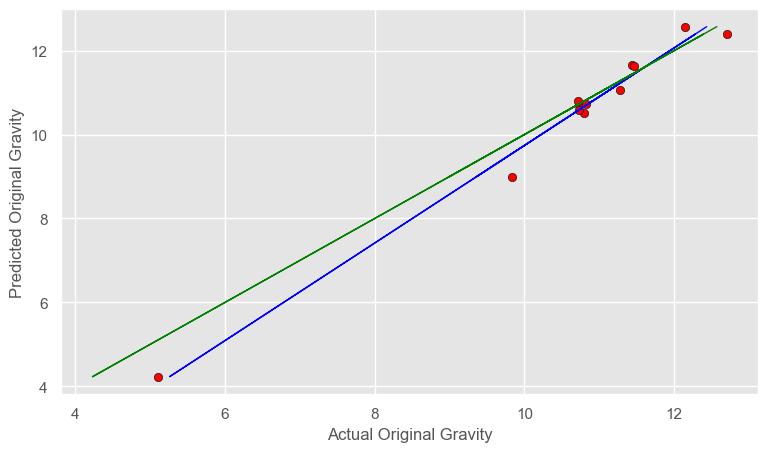

INFO Optimized hyper-params for SVR {'C': 100, 'epsilon': 0.1, 'kernel': 'poly'}
INFO [MODEL EVALUATION]


R-squared score: 0.2282010174782837
Mean Squared Error: 3.383551860891759
Model Performance
Average Error: 1.0341 degrees.
Accuracy = 83.58%.


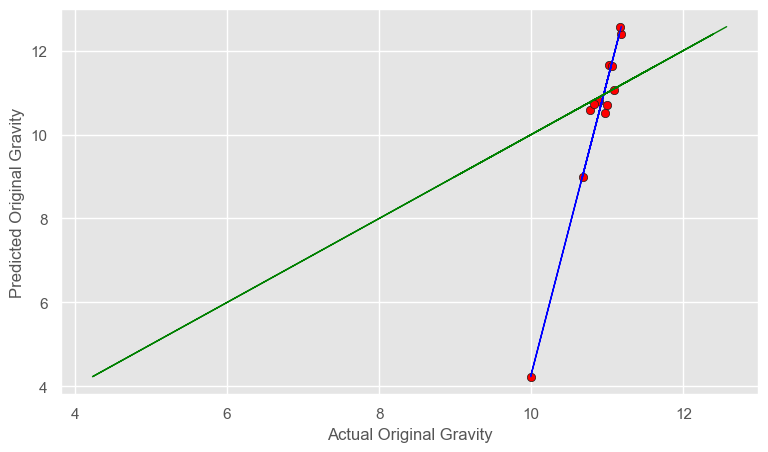

INFO Elapsed time for pipeline run : 1.58
INFO Pipeline end...
INFO ************************************


Improvement of -12.98%.


In [45]:
# Data splitting can be done in various proportions. Check proportions of train-test values available in configfile.ini file
data = (X_train, X_test, y_train, y_test) = util.get_split_data(files=dataset, split_params=split_params, test_size=float(split_size[0]), showDataEDA=False)

# Used only in case of SavGol1
preprocessor_params = {
    'savgol' : {
                'window_size_range' : np.arange(3,63,3),
                'polyorder_range' : np.arange(2,18,2),
                'derivative' : 1
            }
}

# Define custom param_grid for Grid Search CV
param_grid = {
    'kernel': ['poly'],
    'C': [50, 100],
    'epsilon': [0.1]
}

pipeline_params = {
    'logger' : logger,
    'data' : data,
    'validation-type' : validation_types[0],     # not required here
    'preprocessor' : preprocessors[3],              # set 1 for SavGol 1, 3 for SNV, 4 for MSC, 11 for derivative
    'preprocessor-params' : preprocessor_params,
    'model' : models[3],
    'evaluator' : evaluators[0],
    'folds' : int(folds),
    'wl' : wl,
    'plotting' : False,
    'showModelEvaluationPlots' : True,
    'pipeline_run_type' : pipeline_run_types[1],
    'param_grid': param_grid
}

start = timer()
logger.info("************************************")
logger.info("Pipeline Start...")
logger.info("Pipeline params :")
logger.info("Data : " + str(dataset) + " , Preprocessor : " + str(pipeline_params['preprocessor'])
            + ", Model : " + str(pipeline_params['model']) + ", Evaluator : " + str(pipeline_params['evaluator']))
logger.info("Validation type : " + str(pipeline_params['validation-type']) + ", folds (for CV) : " + str(pipeline_params['folds']))
util.pipeline(pipeline_params)
end = timer()
logger.info("Elapsed time for pipeline run : " + str(round((end - start),2)))
logger.info("Pipeline end...")
logger.info("************************************")